# Exploring Weather Data

TerraClimate is a dataset of monthly climate and climatic water balance for global terrestrial surfaces from 1958 to the present (12/01/2019). These data provide important inputs for ecological and hydrological studies at global scales that require high spatial resolution and time-varying data. All data have monthly temporal resolution and a ~4-km (0.036 degree) spatial resolution. This dataset is provided in Zarr format.

The data can be found in the MS Planetary Computer catalog: https://planetarycomputer.microsoft.com/dataset/terraclimate


In [2]:
# Supress Warnings 
import warnings
warnings.filterwarnings("ignore", "invalid value", RuntimeWarning)
# Explore Data
import pandas as pd
import numpy as np
import datetime as dt
# Plotting
import matplotlib.pyplot as plt
# Geospatial
import xarray as xr
# Import Planetary Computer tools
import fsspec
import pystac

### Analysis region
We define our area of interest using latitude and longitude coordinates. Our region of interest is Australia. 

Using the Australia_frog.csv file created  in the Notebook Frog Data we can load this data set and filter the information requier of latitud and longitud and time

In [3]:
Australia_frogs = pd.read_csv('Australia_frogs.csv').drop('Unnamed: 0',axis=1)
min_lon = Australia_frogs['decimalLongitude'].min()
min_lat = Australia_frogs['decimalLatitude'].min()
max_lon = Australia_frogs['decimalLongitude'].max()
max_lat = Australia_frogs['decimalLatitude'].max()
time_min = Australia_frogs['eventDate'].min()
time_max = Australia_frogs['eventDate'].max()
bbox = (min_lon, min_lat, max_lon, max_lat)
latitude = (min_lat, max_lat)
longitude = (min_lon, max_lon)
time_slice = slice(time_min,time_max)

### Load the data for analysis

We load the collection with links to all of the metadata about TerraClimate dataset. The collection contains assets, which are links to the root of a Zarr store, which can be opened with xarray. Once loaded and opened, we can select the parameters we desire for further analyses. 

Overall, there are 18 variables for consideration. We select the variables we think are most likely to be "predictor variables" for frog species habitats:<br>
<br>actual evaporation (aet) - water evaporation monthly in millimeters
<br>accumulated precipitation (ppt) - accumulated monthly in millimeters
<br>soil moisture (soil) - soil moisture in millimeters at end of month
<br>maximum air temperature (tmax) - 2 meters above surface
<br>minimum air temperature (tmin) - 2 meters above surface
<br>water vapor partial pressure in air (vap) - 2 meter above surface in kPa

You can find more information about  this variables in the documentation of TerraClimate dataset 

https://planetarycomputer.microsoft.com/dataset/terraclimate#Storage-Documentation

https://planetarycomputer.microsoft.com/api/stac/v1/collections/terraclimate 

In [4]:
url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/terraclimate"
collection = pystac.read_file(url)
asset = collection.assets["zarr-https"]

In [5]:
store = fsspec.get_mapper(asset.href)
terraclimate_data = xr.open_zarr(store, **asset.extra_fields["xarray:open_kwargs"])
terraclimate_data

,Array,Chunk
Bytes,103.45 GiB,94.92 MiB
Shape,"(744, 4320, 8640)","(12, 1440, 1440)"
Count,1117 Tasks,1116 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,103.45 GiB,94.92 MiB
Shape,"(744, 4320, 8640)","(12, 1440, 1440)"
Count,1117 Tasks,1116 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [6]:
Australiaweather_data = terraclimate_data.sel(lon=slice(min_lon,max_lon),lat=slice(max_lat,min_lat),time=time_slice)
Australiaweather_predvar = Australiaweather_data[['aet','ppt','soil','tmax', 'tmin', 'vap']]
Australiaweather_predvar

<xarray.Dataset>
Dimensions:  (time: 360, lat: 782, lon: 927)
Coordinates:
  * lat      (lat) float64 -11.19 -11.23 -11.27 -11.31 ... -43.65 -43.69 -43.73
  * lon      (lon) float64 115.0 115.1 115.1 115.1 ... 153.5 153.5 153.6 153.6
  * time     (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2019-12-01
Data variables:
    aet      (time, lat, lon) float32 dask.array<chunksize=(12, 452, 120), meta=np.ndarray>
    ppt      (time, lat, lon) float32 dask.array<chunksize=(12, 452, 120), meta=np.ndarray>
    soil     (time, lat, lon) float32 dask.array<chunksize=(12, 452, 120), meta=np.ndarray>
    tmax     (time, lat, lon) float32 dask.array<chunksize=(12, 452, 120), meta=np.ndarray>
    tmin     (time, lat, lon) float32 dask.array<chunksize=(12, 452, 120), meta=np.ndarray>
    vap      (time, lat, lon) float32 dask.array<chunksize=(12, 452, 120), meta=np.ndarray>

### Data Analysis


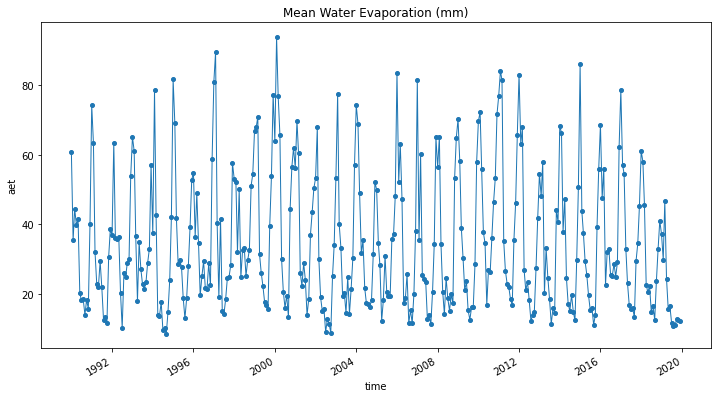

In [12]:
# Water Evaporation
fig = plt.figure(figsize=(12, 6))
Australiaweather_predvar["aet"].mean(dim=["lat","lon"]).plot(marker='o',markersize=4,linewidth=1)
plt.title("Mean Water Evaporation (mm)")
plt.show()

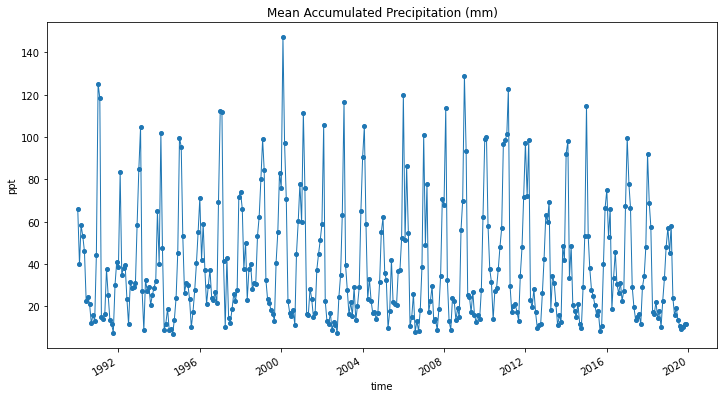

In [8]:
# Precipitation
precip = (Australiaweather_predvar["ppt"]).mean(dim=["lat","lon"])
precip.plot(figsize=(12, 6),marker='o',markersize=4,linewidth=1)
plt.title("Mean Accumulated Precipitation (mm)")
plt.show()

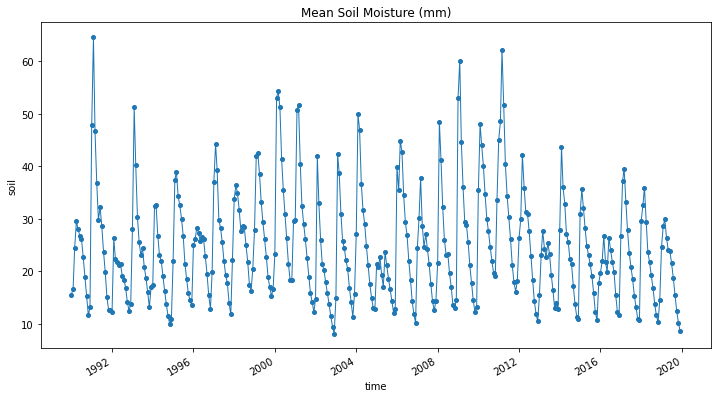

In [9]:
# Soil Moisture
moisture = (Australiaweather_predvar["soil"]).mean(dim=["lat","lon"])
moisture.plot(figsize=(12, 6),marker='o',markersize=4,linewidth=1)
plt.title("Mean Soil Moisture (mm)")
plt.show()

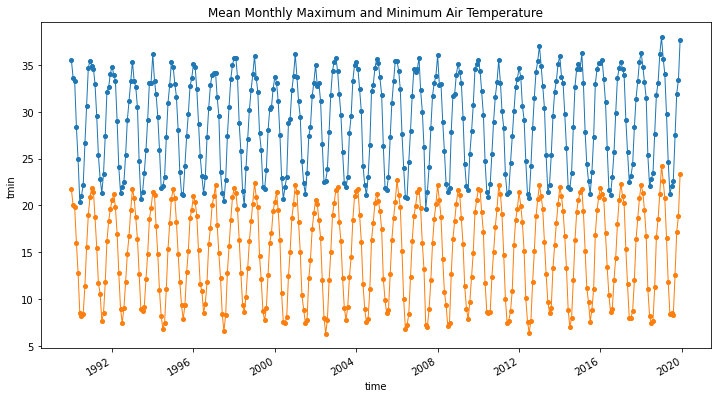

In [13]:
# Min and Max Temp 
fig = plt.figure(figsize=(12, 6))
Australiaweather_predvar["tmax"].mean(dim=["lat","lon"]).plot(marker='o',markersize=4,linewidth=1)
Australiaweather_predvar["tmin"].mean(dim=["lat","lon"]).plot(marker='o',markersize=4,linewidth=1)
plt.title("Mean Monthly Maximum and Minimum Air Temperature")
plt.show()

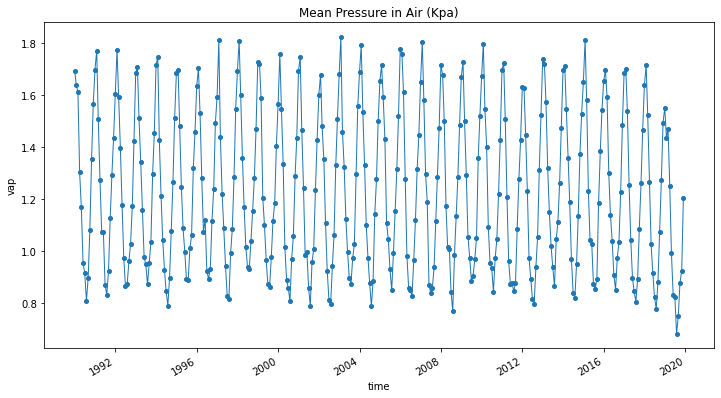

In [11]:
# Partial pressure in air
moisture = (Australiaweather_predvar["vap"]).mean(dim=["lat","lon"])
moisture.plot(figsize=(12, 6),marker='o',markersize=4,linewidth=1)
plt.title("Mean Pressure in Air (Kpa)")
plt.show()